# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub

- Name: Maxwell Rossip
- GitHub Username: psychdeathbox

# Research Question

Do people in North Carolina localities prefer a specific type of food and are their ratings reliable? 

## Background and Prior Work

*Fill in your background and prior work here* 
Yelp claims that it "connects people with great local businesses." But how true is that really? According to one source, almost 16% of Yelp inspections are fake. Yelp claims their algorithm combs through and trashes the fake, overly spiteful, and owner-written reviews, but relying solely on the people we can find out how best to judge a review. Often the star rating and price is the first thing you find on a google search of "hotdog places nearby" and such limited information can be misleading.
Inspecting food choices based on this alone can leave you with a bad or overpriced hotdog. Let's see if the data says otherwise.


References (include links): 
- 1)https://www.yelp.com/about
- 2)http://www.bu.edu/articles/2013/yelp-reviews-can-you-trust-them/#:~:text=Yelp%20says%20its%20filter%20algorithm,submitted%20by%20the%20businesses%20themselves.

# Hypothesis



Popular foods in North Carolina will have a positive relationship between price and rating.


# Dataset(s)

- Dataset Name: 'yelp.csv'
- Link to the dataset: provided
- Number of observations: 3688
- This dataset includes restaurants and information regarding their attributes such as what they sell, whether they're open, their zipcode, and customer rated price among other things.


Setup

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Describe your data cleaning steps here.

In [125]:

#Read into dfs and explore
yelp = pd.read_csv('yelp.csv')


print(yelp.shape)


yelp.head()


(3688, 31)


,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False


In [32]:
#Filtering out closed restaurants
yelpopen = yelp[yelp.is_closed == False]
yelpopen=yelpopen.reset_index(drop =True)
yelpopen.head


#filtering out NA values for price
yelpprice = yelpopen.dropna(subset = ['price'])

#reset the index
yelpprice=yelpprice.reset_index(drop =True)
yelpprice.head()


,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False


In [42]:
#Converting price ratings to numbers and dropping garbage values


yelp_num_price = yelpprice.replace(to_replace = ['$','$$','$$$','$$$$'], value = [1,2,3,4])

yelp_num_price.dtypes
yelp_num_price['price'] = yelp_num_price['price'].astype(object).astype(int)


yelp_num_price = yelp_num_price[yelp_num_price.price < 5]
yelp_num_price = yelp_num_price.reset_index(drop =True)
yelp_num_price







,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,2,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,1,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,1,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,2,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,giardino-gourmet-salads-cary,giardino gourmet salads,False,4.5,6,821 Bass Pro Ln,27513,35.830766,-78.769883,1,...,False,False,False,False,False,True,False,False,False,False
2867,ollies-wake-forest,ollies,False,4.5,9,213 S White St,27587,35.977600,-78.509650,1,...,False,False,False,False,False,False,False,False,False,False
2868,stammtisch-caf̩-cary-2,stammtisch caf̩,False,3.0,1,Siemens Healthcare Campus,27511,35.735695,-78.803749,1,...,False,False,False,False,False,False,False,False,False,False
2869,sangam-mart-morrisville,sangam mart,False,4.0,5,10300 Hwy 54,27560,35.872600,-78.851010,1,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Restaurant Volume by Price Category')

<Figure size 720x720 with 0 Axes>

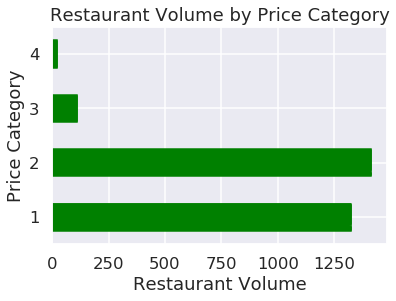

In [122]:
#Univariate EDA

plt.figure(figsize=(10,10))


yelp_num_price.groupby('price').count().plot(kind = 'barh', legend = False, Color='green')
plt.xlabel('Restaurant Volume')
plt.ylabel('Price Category')
plt.title('Restaurant Volume by Price Category')

#Here I can see that the majority of restaurants are 
#rated cheaply, indicating that expensive restaurants
# are few and uncompetitive

In [96]:
food = [
    'hotdogs','sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery',
    'breakfast_brunch', 'coffee', 'chinese', 'italian', 'newamerican',
    'chicken_wings', 'delis', 'bars', 'salad', 'seafood', 'bbq', 'bakeries',
    'sushi'
]
food_types = yelp[food]
food_types = food_types.astype('int64')
food_types

#Since I wanted to see how many food type places are in the dataset I had to cast the boolean values as integers
#which results in the following table

,hotdogs,sandwiches,pizza,tradamerican,burgers,mexican,grocery,breakfast_brunch,coffee,chinese,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Food Popularity by Number of Restaurants')

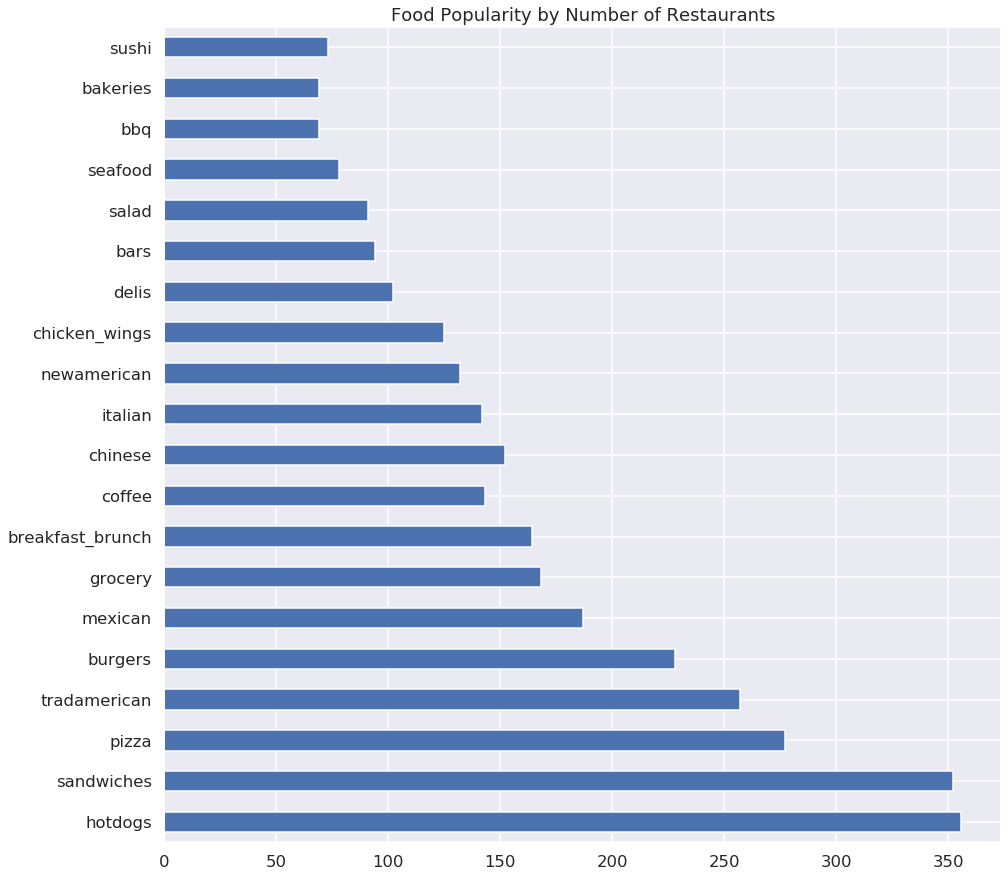

In [127]:
food_types.sum().plot.barh(figsize=(15,15))
plt.title('Food Popularity by Number of Restaurants')
#Here I can see the frequencies of the food places in the yelp reviews
# I see that hot dogs are the most populatr food type within the given
# North Carolina zipcodes

#(2) more biavariate

In [105]:
# since hot dogs are the most popular, I decided to see the average rating for hotdogs
hd_df = yelp[yelp.hotdogs == True]
hd_df.head()

#(3) hotdog analysis

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False
7,bojangles-wilson-2,bojangles,False,3.5,21,5033 Raleigh Rd Pkwy W,27896,35.763565,-78.008926,$,...,False,False,False,False,False,False,False,False,False,False
14,sonic-drive-in-wilson,sonic drive-in,False,3.5,3,2401 Forest Hills Rd W,27893,35.732780,-77.952700,$,...,False,False,False,False,False,False,False,False,False,False
118,chick-fil-a-durham-6,chick-fil-a,False,4.5,21,7836 Leonardo Dr,27713,35.901544,-78.957799,$,...,False,False,False,False,False,False,False,False,False,False
126,kfc-raleigh-7,kfc,False,2.0,5,3408 Poole Road,27610,35.768300,-78.579900,$,...,False,False,True,False,False,False,False,False,False,False


In [112]:
#Verifying that this dataset is only comprised of places that sell hotdogs
hd_df.hotdogs.unique() 

#Here I see that the only unique element in this column is true so that means we are correct and this is nothing but hotdogs

array([ True])

Text(0, 0.5, 'Review Counts')

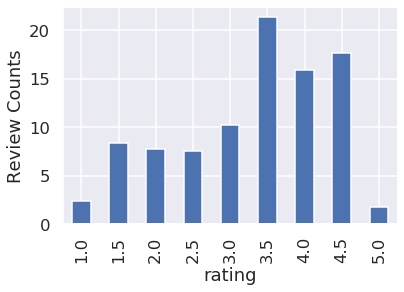

In [117]:
hd_df.groupby('rating').mean().review_count.plot.bar()
plt.ylabel('Review Counts')
# I can see here that 5 star ratings are not really that reliable because there's a
# noticably low number of 5 star ratings meaning a small sample size
# there's also very few 1 star ratings
# this indicates a ratings bias where people tend to avoid the 
# extremes on any rating scale


In [121]:
# reliable places to get a pretty good hotdog
recoms = hd_df[hd_df.rating >= 4].name.values
# for visuals
for name in list(dict.fromkeys(recoms)):
    print(name)

chick-fil-a
subway
jersey mike's subs
hardee's
arby's
jersey mike's
zaxby's chicken fingers & buffalo wings
mcdonald's
aubreys and peedies grill
firehouse subs
burger 21
wendy's
blaze fast-fire'd pizza
five guys burgers and fries
bojangles
bojangles restaurant
dairy queen
quiznos
cariokos rotisserie chicken
char-grill
cook out
smithfields chicken n bar b-q
mod pizza


,Average Price Category
rating,
1.0,1.181818
1.5,1.260000
2.0,1.424528
2.5,1.477273
3.0,1.558621


Text(0, 0.5, 'Average Price Category')

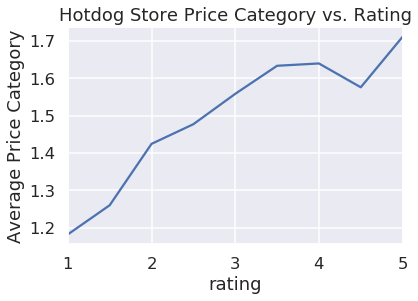

In [129]:
# Average price category
price_by_rating = pd.pivot_table(yelp_num_price, values = 'price', index = 'rating')
price_by_rating.rename(columns={'price':'Average Price Category'}, inplace = True)
display(price_by_rating.head())

price_by_rating.plot.line(legend=False)
plt.title('Hotdog Store Price Category vs. Rating')
plt.ylabel('Average Price Category')
#(2) Bivariate

In [ ]:
#Above we see that rating is at least postively related
#to the average price by category
# we can see that places that serve hotdogs are all
#pretty cheap on average scoring below 2 $$ across
#all ratings. 


In [123]:
yelp_num_price['price'].unique

<bound method Series.unique of 0       2
1       1
2       1
3       2
4       1
       ..
2866    1
2867    1
2868    1
2869    1
2870    1
Name: price, Length: 2871, dtype: int64>

Include cells that describe the steps in your data analysis.

I saw that hotdogs are the most popular food in 
North Carolina. 
I wanted to see how reliable the Yelp inspections ratings were based on the frequency with which they appeared, with fewer ratings indicating less reliability.
In addition, rating diversity ranged across a low price point not more than an average 2/4 expensiveness rating.

# Ethics & Privacy

My question is completely harmless. I simply ask what do people prefer and can yelp inspections be relied upon.

Implications:
This might affect how people look at yelp reviews in this area. Perhaps it could be used to cyberbully people in North Carolina for their eating habits. I can't guarantee their protection.

Data: The data is from Yelp provided by Prof. Ellis. I have a dataset that's not expansive, but definitely dense enough to gain an understanding. (>2700 observations) I think the biases actually get uncovered here showing that people are shy to rate restaurants as 1 or 5 stars.

Informed Consent:
I technically do not have informed consent. I believe people knew this risk when they submitted the information to yelp as a sort of acceptance to living in a reversal of Benthams Panopticon. That is, everyone believes they are being surveilled but don't change their behavior.

Privacy:
I can guarantee privacy as there is no identifying data on individuals. This project will also hopefully never see the light of day.

Evaluation:
This data is for the benefit of the consumer using yelp to guide decisions. Uncovering the reality of yelp reviews is not going to change how people review.

Analysis:
I'm inferring true restaurant prices from ratings divided into four levels of cost.

Transparency & Appeal
This should be very clear in the way I've explained it.

Continuous monitoring:
Should be relatively easy to get new Yelp Data

# Conclusion & Discussion

Discuss your project. Summarize your data and question. Briefly describe your analysis. Summarize your results and conclusions. Be sure to mention any limitations of your project. Discuss the impact of this work on society. (2-3 paragraphs)

I used data from yelp inspections and sought to uncover 
the reliability of that data within itself.
This project is limited by the lack of objectivity of the data, but that is a good discovery anyway. It would be wise to uncover more using sentiment analysis of the written reviews and how they relate to the pricepoints and star ratings.

Hotdogs are the most popular food in North Carolina but the ratings are not very reliable due to the infrequency of extreme values. In the practical sense, a 5 star rating of a hotdog place is likely a fluke where someone was in a really good mood that day.

This is good for the average person using yelp to know that 4-stars doesn't mean something was necessarily wrong with the place, people are just shy to rate highly.